In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_excel('tp2_wealth_data.xlsx', index_col=0)
df.cumsum().iloc[85:]

,wlth,inc
0.86,11381.3786,6850.9275
0.87,11922.1436,7011.7570
0.88,12489.6436,7175.4880
0.89,13087.1391,7343.6570
0.90,13716.8891,7515.9370
0.91,14382.2941,7693.2295
0.92,15073.8421,7875.4625
0.93,15803.4721,8063.6630
0.94,16557.6871,8259.5910
0.95,17353.5871,8463.2610


# Question 1

In [3]:
cum = np.array(df.cumsum())


In [4]:
med = df.loc[0.5]['inc']
top10 = df[df.index >= 0.9]['inc'].sum()
top5 = df[df.index >= 0.95]['inc'].sum()
sumall = df['inc'].sum()
print(med, top10/sumall, top5/sumall)

87.225 0.22117689655040762 0.12403856881601055


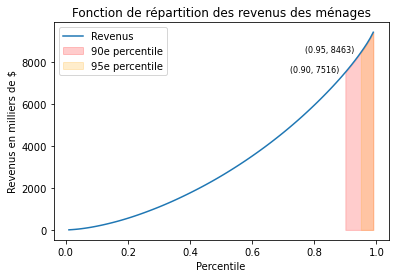

In [5]:
xax = df.index
perc10 = 0
plt.plot(xax, cum[:,1], label="Revenus")
plt.ylabel(r'Revenus en milliers de $')
plt.xlabel(r'Percentile')
plt.fill_between(xax,cum[:,1], where=(xax>=0.9), color="red", label="90e percentile", alpha=0.2)
plt.fill_between(xax,cum[:,1], where=(xax>=0.95), color="orange", label="95e percentile", alpha=0.2)
plt.legend()
plt.annotate('(0.90, 7516)', xy=(0.8, 7516), fontsize=8, ha="center")
plt.annotate('(0.95, 8463)', xy=(0.85, 8463), fontsize=8, ha="center")

plt.title('Fonction de répartition des revenus des ménages')
plt.show()

Les revenus médians des ménages sont de 87.225 milliers de $, 10% des ménages avec les plus haut revenus s'accaparent de 22% des revenus totaux des ménages et 5% des ménages avec les plus haut revenus s'accaparent de 12% des revenus totaux des ménages

# Question 2

In [6]:
med = df.loc[0.5]['wlth']
top10 = df[df.index >= 0.9]['wlth'].sum()
top5 = df[df.index >= 0.95]['wlth'].sum()
sumall = df['wlth'].sum()
print(med, top10/sumall, top5/sumall)

106.95 0.3737171627084755 0.207634672732005


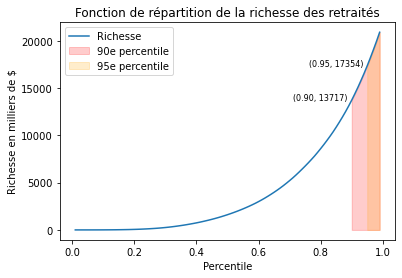

In [7]:
xax = df.index
perc10 = 0
plt.plot(xax, cum[:,0], label="Richesse")
plt.ylabel(r'Richesse en milliers de $')
plt.xlabel(r'Percentile')
plt.fill_between(xax,cum[:,0], where=(xax>=0.9), color="red", label="90e percentile", alpha=0.2)
plt.fill_between(xax,cum[:,0], where=(xax>=0.95), color="orange", label="95e percentile", alpha=0.2)
plt.legend()
plt.annotate('(0.90, 13717)', xy=(0.8, 13717), fontsize=8, ha="center")
plt.annotate('(0.95, 17354)', xy=(0.85, 17354), fontsize=8, ha="center")

plt.title('Fonction de répartition de la richesse des retraités')
plt.show()

La richesse médiane des retraités est de 106.95 milliers de $, 10% des retraités les mieux nantis s'accaparent de 37%  de la richesse totale des retraités et 5% des retraités les mieux nantis s'accaparent de 21% de la richesse totale des retraités

On en conclut que la répartition des salaires au sein des ménages ainsi que la répartition de la richesse au seins de la population retraitée suivent tout deux une relation exponentielle. On observe que la répartition des revenus au sein des ménages tend à être moins inégales que la répartition de la richesse au sein de la population retraitée. 

# Question 3

In [17]:
def u(y, s, discount, periods, ear):
    per_rate = (1+ear)**(periods) - 1
    return np.log(y-s) + (discount ** periods)*np.log(s(1+per_rate))


# Question 5

In [18]:
df['remp'] = 1 - df.index

# Question 8

In [26]:
def gini(y):
    n = len(y)
    y_nom = [(n+1-(i+1))*val for i, val in enumerate(y)]
    return 1/n * (n + 1 - 2*sum(y_nom)/sum(y))

# Question 9

In [30]:
inc = list(df.inc)
wlth = list(df.wlth)
print(gini(inc), gini(wlth))

0.3262056618470098 0.6020629105915184


On observe que le coefficient de Gini où la variable est le revenu est de 0.326 alors que le coefficient de Gini où la variable est la richesse est de 0.602. On peut alors affirmer que la richesse a un plus grand impact sur l'inégalité au sein de la population que le revenu. Ceci semble évident puisqu'une cummulation d'année de travail à revenu différents génère des écarts plus importants entre les différents percentiles de richesse.

# Question 10